# Importing Libraries

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from time import time

# Data Generation

In [2]:
X, Y = make_regression(n_features = 1, n_samples = 500, noise = 10)

In [3]:
Y = Y.reshape(X.shape[0],1)

In [4]:
print(X.shape, Y.shape)

(500, 1) (500, 1)


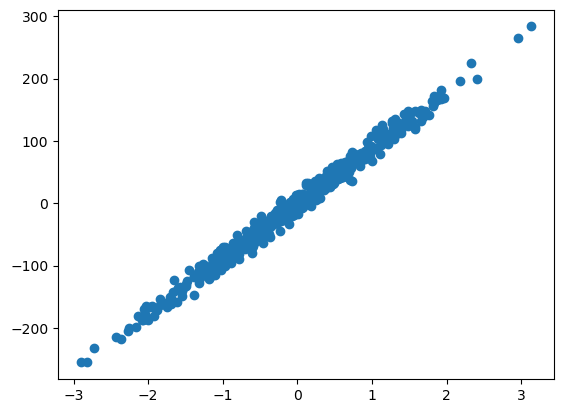

In [5]:
plt.scatter(X,Y)

# Model

In [6]:
def model(X, THETA):
    return X.dot(THETA)

# MSE : Mean Squared Error _ Cost function

In [7]:
def MSE(X, Y, THETA):
    return 1/(2*X.shape[0])*np.sum((model(X, THETA)-Y)**2)

# Gradient

In [8]:
def grad(X, Y, THETA):
    return 1/len(Y)*X.T.dot(X.dot(THETA)-Y)

# Gradient Descent 

In [9]:
def gradient_descent(X, Y, THETA, learning_rate, nbr_itterations):
    cost_history = np.ones(nbr_itterations)
    for i in range(nbr_itterations):
        THETA = THETA - learning_rate*grad(X,Y,THETA)
        cost_history[i] = MSE(X, Y, THETA)
    return THETA, cost_history

# Coefficient of Determination

In [10]:
def R2(Y, pred):
    u = ((Y-pred)**2).sum()
    v = ((Y-Y.mean())**2).sum()
    return 1-u/v

# Training & parameters

In [11]:
THETA1 = np.random.randn(2,1)
THETA2 = np.random.randn(3,1)
print(THETA1, THETA2, sep="\n")

[[ 1.16848695]
 [-1.3756517 ]]
[[0.11577882]
 [2.08057259]
 [0.60185578]]


(500, 2) (500, 3) (500, 1)


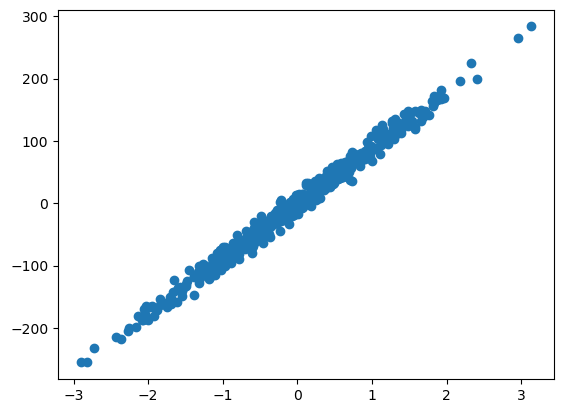

In [12]:
plt.scatter(X, Y)
X1 = np.hstack((X, np.ones(X.shape)))
X2 = np.hstack((np.hstack((X**2, X)),np.ones(X.shape)))
print(X1.shape, X2.shape, Y.shape)

In [13]:
learning_rate = 0.03
itterations = 300

In [14]:
# Linear Model
start = time()
THETA, COST = gradient_descent(X1, Y, THETA1, learning_rate, itterations)

print("Training time : ", time()-start)

Training time :  0.022705793380737305


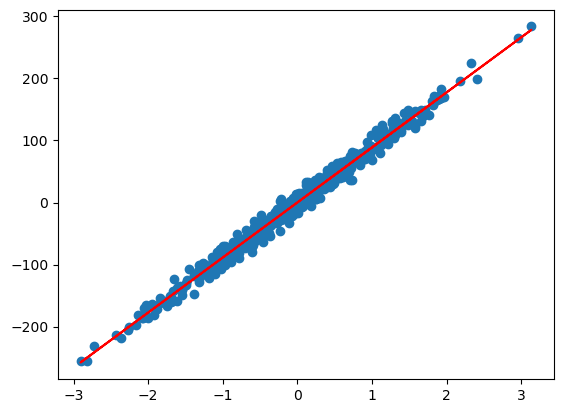

In [15]:
plt.scatter(X,Y)
plt.plot(X, model(X1, THETA), c='red')

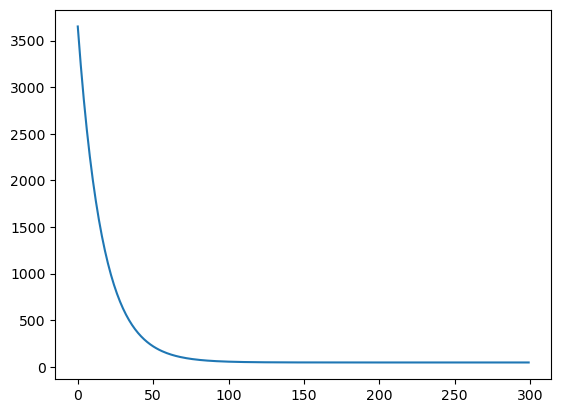

In [16]:
# Prediction evolution
plt.plot(range(itterations), COST)

In [17]:
R2(Y, model(X1, THETA))

0.9883285116426305

In [18]:
# Polynomial model
Y = Y + abs(Y)/2 # We change a little bit the target to have a clear polynomial form
start = time()
THETA, COST = gradient_descent(X2, Y, THETA2, learning_rate, itterations)

print("Training time : ", time()-start)

Training time :  0.026894092559814453


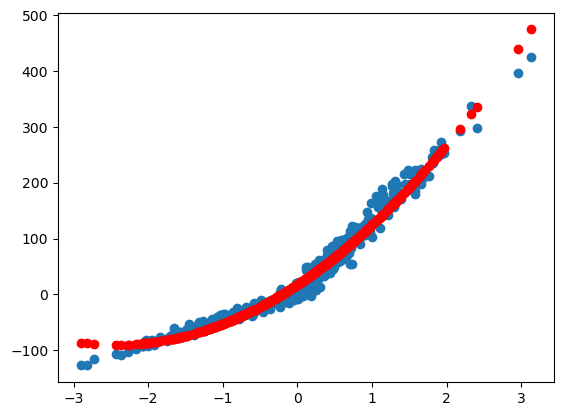

In [19]:
plt.scatter(X, Y)
plt.scatter(X, model(X2, THETA), c='red')

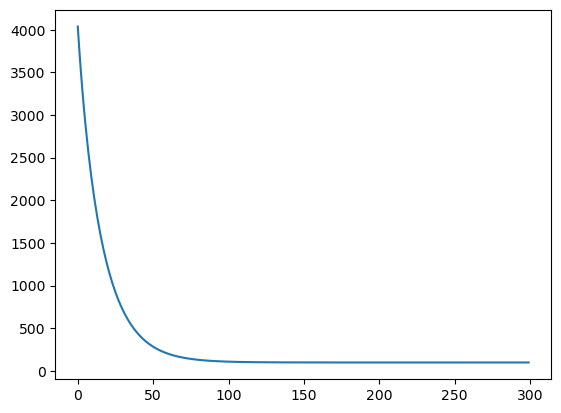

In [20]:
plt.plot(range(itterations), COST)

In [21]:
R2(Y, model(X2, THETA))

0.9760794120719899